## Implement Gradient Descent Algorithm for House Price Prediction

This is a template for Assignment 2 of **Optimization and Linear Regression using Gradient Descent** (Monday of Week 8).

Fill in the **None** part in this template. Feel free to add more cells to this notebook to perform all the tasks that you are asked to do.

The goal in this assignment is to build a linear regression model to predict the house price based on its size.

In [4]:
# Put your code here (3 lines of code)
# Import numpy, pandas, and matplotlib.pyplot 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Put your code here (1 line of code)
# Load the dataset
data = pd.read_csv('c:/Users/vl4di/Downloads/house-prices.csv')

In [6]:
# Put your code here (1 line of code)
# Take a look at the data, use head method for data
data.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [7]:
# Select the size and price values from the dataset and assign them to 
# variables X and Y
X_dat = data['SqFt'].to_numpy()
Y_dat = data['Price'].to_numpy()

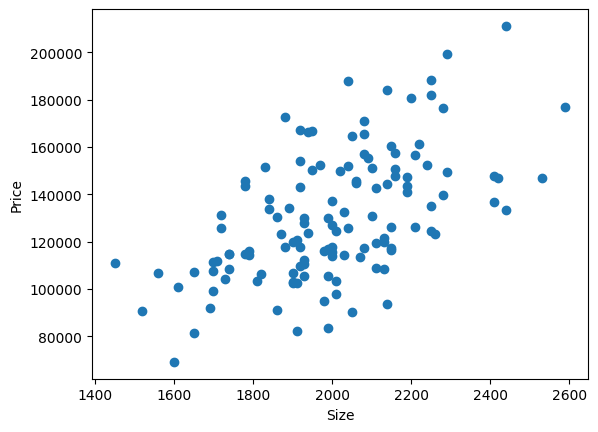

In [8]:
# Put your code here (1 line of code)
# Plot a scatter plot for X_dat and Y_dat
# Take alook at our data
plt.scatter(X_dat, Y_dat)

plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

It is always good practice to normalize our data to increase the convergence rate of the Gradient Descent algorithm.

In [9]:
# Normalize our data
X = (np.max(X_dat) - X_dat)/(np.max(X_dat) - np.min(X_dat)) 
Y = (np.max(Y_dat) - Y_dat)/(np.max(Y_dat) - np.min(Y_dat)) 

Now that our data is prepared, let's start creating the necessary functions to implement the Gradient Descent algorithm.

### Linear Regression Model

At first step, we need to define our linear regression model. The model is as follows:

$$y=wx+b$$

In [10]:
# Define the linear regression model
def LR_model(x, w, b):
    # x: a scalar value, the size of the house
    # w: the weight of the model, a scalar value
    # b: the intercept of the model, a scalar value
    
    # Put your code here (1 line of code)
    # Define the linear regression model
    y = w * x + b
    
    return y

### Cost Function

Now, we need to define the cost function. The cost function is a mean squared error function. 

The mean squared error cost function for our linear regression can be formulated as:

$$J(w,b)=\dfrac{1}{2m} \sum_{i=1}^{m} {\left(\hat y^{(i)} - y^{(i)}\right)^2}= \dfrac{1}{2m} \sum_{i=1}^{m} {\left(wx+b - y^{(i)}\right)^2}$$



In [31]:
# Implement the cost function (mean squared error function)
def cost(X, Y, w, b):
    # X: a vector contains the size of the houses
    # Y: a vector contains the price of the houses
    # w: weight of the linear regression model
    # b: intercept of the model
    
    # Number of the observations
    m = len(X)
    
    # Cost value
    
    # Put your code here (1 line of code)
    # Initilize the sum as zero 
    J = 0
    
    for i in range(m):
        x = X[i]
        y = Y[i]
        
        # Put your code here (1 line of code)
        # Use LR_model to compute the prediction of the price based on the size
        y_pred = LR_model(x, w, b)
        
        # Put your code here (1 line of code)
        # Compute the cost function (mean squared error cost function)
        J += (y_pred - y)**2
    J = np.sum(J)/(2*m)

    return J
    

To make sure that you have correctly implemented the cost function, run the following cell and compare the obtained result with the given value. 

In [32]:
# Use your function to compute the cost for the following values
cost(X, Y, 2, 3)

6.050766241298438

The expected value is: 6.050766241298438

### Gradient Descent Update Rule

Now you need to implement the Gradient Descent update rule as follows:

$$ \qquad \left\{ \begin{array}{l} w_{n+1} = w_{n} -  \dfrac{\alpha}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)x^{(i)} \\ b_{n+1} = b_{n} -  \dfrac{\alpha}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right) \end{array} \right.$$


Here, $\alpha$ is the learning rate, $m$ is the number of the observations. Note that you are able to compute $\hat{y}^{(i)}$ using your previously developed function **LR_model**.

In [40]:
def grad_descent_step(X, Y, w, b, alf):
    # X: a vector contains the size of the houses
    # Y: a vector contains the price of the houses
    # w: weight of the linear regression model
    # b: intercept of the model
    # alf: learning rate (a scalar value)
    alf = 0.01
    # Number of the observations
    m = len(X)
    
    # Put your code here (2 lines of code)
    # Initilize both sum_w and sum_b as zero
    sum_w = 0
    sum_b = 0
    
    # A for loop to compute the sums appear in the update rule
    for i in range(m):
        x = X[i]
        y = Y[i]
        
        # Put your code here (1 line of code)
        # Use your LR_model to compute a prediction with x, w, b
        y_pred = LR_model(x, w, b)
        
        # Put your code here (2 lines of code)
        # Compute the sums appear in the update rule
        sum_w += (y_pred - y) * x
        sum_b += (y_pred - y)
    
    # Put your codes here (2 lines of code)
    # Implement the update rule for the gradien descent
    w_new = w - (alf / m) * sum_w
    b_new = b - (alf / m) * sum_b
    
    return w_new, b_new

Now that you have implemented the Gradient Descent update rule, to ensure its correctness, run the following cell and compare your result with the provided one.

In [41]:
grad_descent_step(X, Y, 2, -3, 0.01)

(2.0126078237441893, -2.97465021756207)

The expected values are as follows:
    
(2.0126078237441893, -2.97465021756207)

### Implement Gradient Descent Algorithm

Now, it is time to implement the Gradient Descent algorithm using your already developed functions.

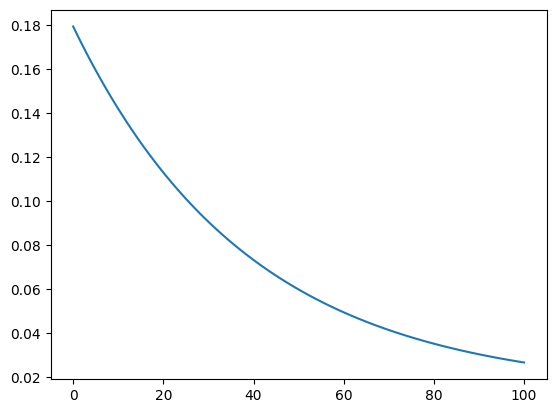

In [42]:
# Put your code here (1 line of code)
# Choose an initial value for w
w_init = 0.0

# Put your code here (1 line of code)
# Choose an initial value for b
b_init = 0.0

# Put your code here (1 line of code)
# Choose the learning rate
alf = 0.01

# Put your code here (1 line of code)
# Choose the number of iterations
N = 100

# Save the values for w, b
W = np.zeros(N + 1)
B = np.zeros(N + 1)
C = np.zeros(N + 1)

# Save initial values
W[0] = w_init
B[0] = b_init

# Put your code here (1 line of code)
# Save the cost for w_init and b_init using cost function
C[0] = cost(X, Y, w_init, b_init)

# A loop to iteratively apply the update rule 
for n in range(N):
    
    # Put your code here (1 line of code)
    # Use grad_descent_step function to find new values for w, b
    w_new, b_new = grad_descent_step(X, Y, W[n], B[n], alf)
    
    # Put your code here (2 lines of code)
    # Save the new values for w and b 
    W[n+1] = w_new
    B[n+1] = b_new
    
    # Put your code here (1 line of code)
    # Save the cost value for compute new values of w and b 
    # Use the cost function you have already implemented
    C[n+1] = cost(X, Y, w_new, b_new)

# Plot the results
plt.plot(range(N+1),C)
plt.show()

Now, plot the obtained results:

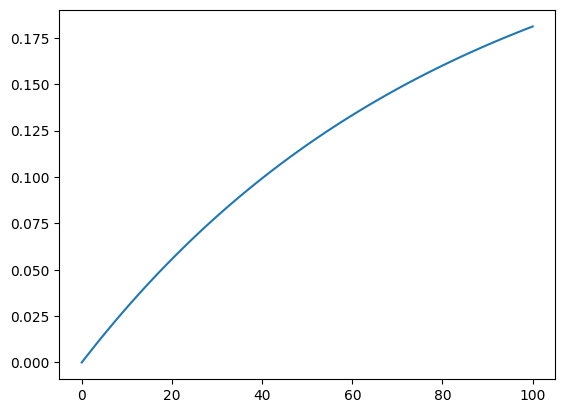

In [43]:
# Put your code here (1 line of code)
# Plot the saved values of W against the iteration.
plt.plot(range(N+1), W)

plt.show()

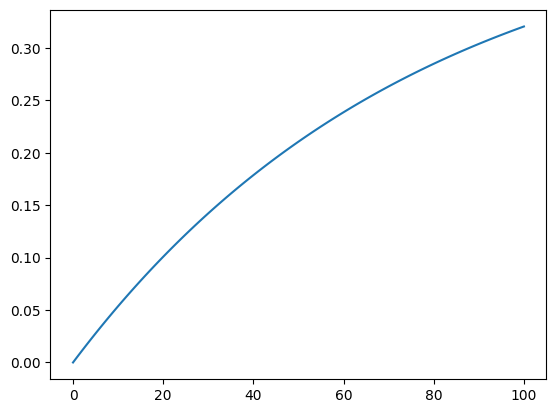

In [44]:
# Put your code here (1 line of code)
# Plot the saved values of B against the iteration.
plt.plot(range(N+1), B)

plt.show()

In [45]:
# Put your code here (2 lines of code)
# Define the final values (optimal values) of w and b
w_opt = W[-1]
b_opt = B[-1]

print("The optimal value for w:", w_opt)
print("The optimal value for b:", b_opt)

The optimal value for w: 0.18113451764787447
The optimal value for b: 0.3204031680251432


Since we initially normalized the data, in this section, we inverse the normalization to represent the model using the initial values of the data.

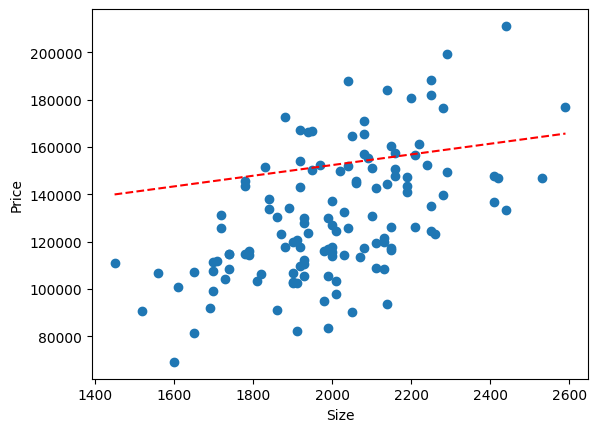

In [46]:
X_max = np.max(X_dat)
X_min = np.min(X_dat)

Y_max = np.max(Y_dat)
Y_min = np.min(Y_dat)

X_line = np.linspace(X_min, X_max, 100)
Y_line_norm = w_opt * (X_max - X_line)/(X_max - X_min) + b_opt
Y_line = Y_max - Y_line_norm * (Y_max - Y_min) 
plt.plot(X_line,Y_line, 'r--')


plt.scatter(X_dat,Y_dat)

plt.xlabel('Size')
plt.ylabel('Price')
plt.show() 

### Compare with Scikit-learn

Congratulations! You have finished building a linear regression model from scratch. Perhaps you are curious to compare your model with the one obtained using the Scikit-learn package. In what follows, you will train the same model using Scikit-learn, and you can compare your model with that one.

In [47]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X.reshape(-1,1), Y)

In [48]:
print("The optimal value for w:", reg.coef_)

The optimal value for w: [0.563392]


In [49]:
print("The optimal value for b:", reg.intercept_)

The optimal value for b: 0.2773044733289968


If your model is significantly different from that of Scikit-learn, try to fine-tune the hyperparameters in your algorithm, such as the learning rate and the number of iterations. You should aim to achieve similar results.

Good Luck!

Optimal value for w: 0.18113451764787447
Optimal value for b: 0.3204031680251432


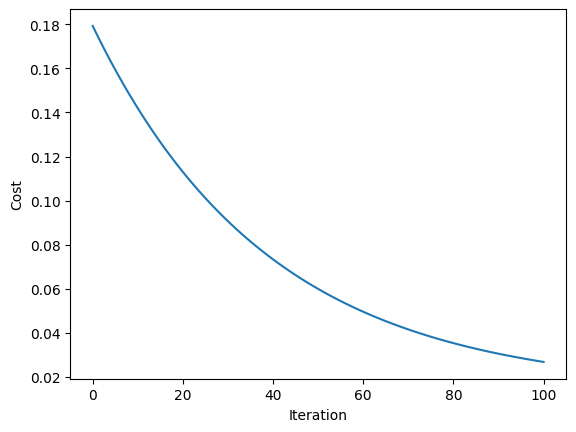

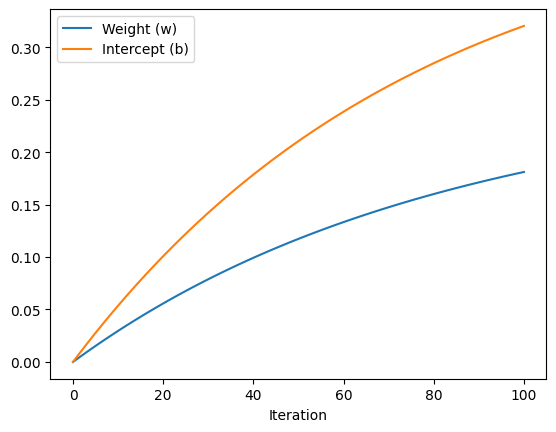

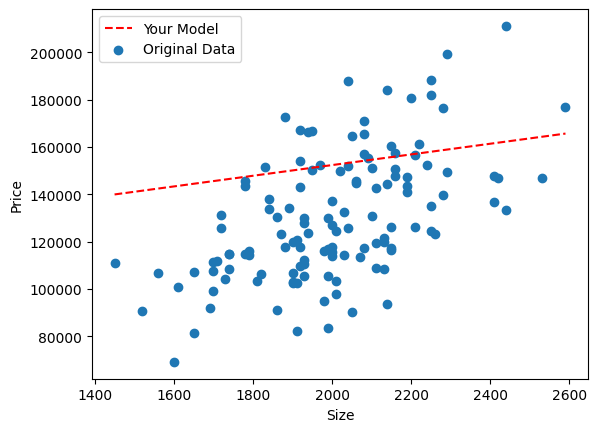

In [50]:
# Fine-tune hyperparameters
w_init = 0.0
b_init = 0.0
alpha = 0.01  # Adjust the learning rate
N = 100       # Adjust the number of iterations

# Save the values for w, b, and the cost function
W = np.zeros(N + 1)
B = np.zeros(N + 1)
C = np.zeros(N + 1)

# Save initial values
W[0] = w_init
B[0] = b_init

# Save the cost for w_init and b_init using cost function
C[0] = cost(X, Y, w_init, b_init)

# A loop to iteratively apply the update rule 
for n in range(N):
    # Use grad_descent_step function to find new values for w, b
    w_new, b_new = grad_descent_step(X, Y, W[n], B[n], alpha)
    
    # Save the new values for w and b 
    W[n+1] = w_new
    B[n+1] = b_new
    
    # Save the cost value for the new values of w and b 
    # Use the cost function you have already implemented
    C[n+1] = cost(X, Y, w_new, b_new)

# Print the final values
print("Optimal value for w:", W[-1])
print("Optimal value for b:", B[-1])

# Plot the cost function
plt.plot(range(N+1), C)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

# Plot the saved values of W and B against the iteration
plt.plot(range(N+1), W, label='Weight (w)')
plt.plot(range(N+1), B, label='Intercept (b)')
plt.xlabel('Iteration')
plt.legend()
plt.show()

# Plot the linear regression model along with the original data
Y_line_norm = W[-1] * (X_max - X_line) / (X_max - X_min) + B[-1]
Y_line = Y_max - Y_line_norm * (Y_max - Y_min) 

plt.plot(X_line, Y_line, 'r--', label='Your Model')
plt.scatter(X_dat, Y_dat, label='Original Data')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.show()